  country  year  life_expectancy        gdp
0   Chile  2000             77.3  77.860932
1   Chile  2001             77.3  70.979924
2   Chile  2002             77.8  69.736811
3   Chile  2003             77.9  75.643460
4   Chile  2004             78.0  99.210393
              year  life_expectancy           gdp
count    96.000000        96.000000     96.000000
mean   2007.500000        72.789583   3880.498571
std       4.633971        10.672882   5197.561311
min    2000.000000        44.300000      4.415703
25%    2003.750000        74.475000    173.301750
50%    2007.500000        76.750000   1280.220000
75%    2011.250000        78.900000   4067.510000
max    2015.000000        81.000000  18100.000000
country             object
year                 int64
life_expectancy    float64
gdp                float64
dtype: object
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


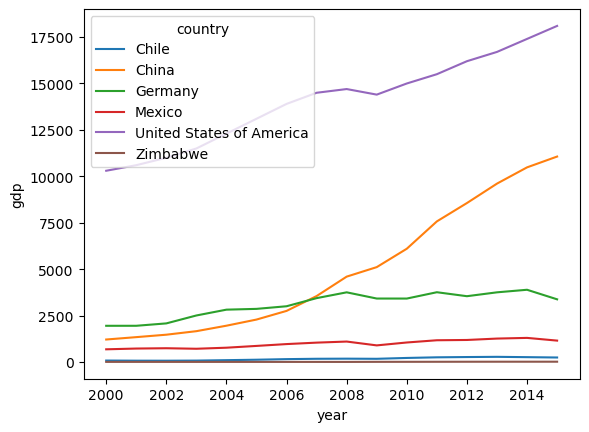

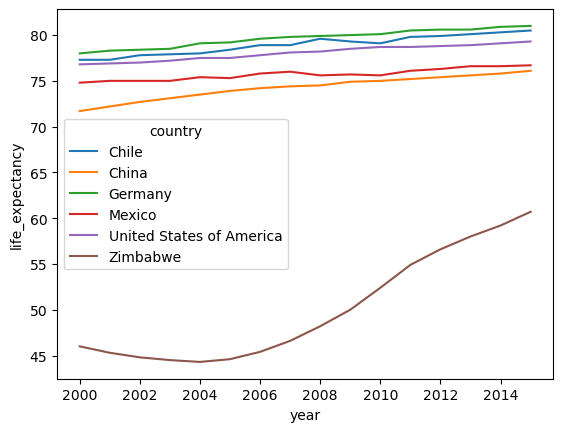

<Figure size 640x480 with 0 Axes>

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import pearsonr

df = pd.read_csv("all_data.csv")
df = df.rename(columns={'Country': 'country', 'Year': 'year', 'Life expectancy at birth (years)': 'life_expectancy', 'GDP': 'gdp'})
df.gdp = df.gdp/1000000000
print(df.head())
print(df.describe())
print(df.dtypes)
print(df.country.unique())

df_chile = df[df.country == 'Chile']
df_china = df[df.country == 'China']
df_germany = df[df.country == 'Germany']
df_mexico = df[df.country == 'Mexico']
df_usa = df[df.country == 'United States of America']
df_zimbabwe = df[df.country == 'Zimbabwe']

sns.lineplot(x ='year', y='gdp', data=df, hue=df.country)
plt.show()
plt.clf()

sns.lineplot(x ='year', y='life_expectancy', data=df, hue=df.country)
plt.show()
plt.clf()

life_expectancy
n: 16
Mean: 50.09375000000001
Median: 47.400000000000006


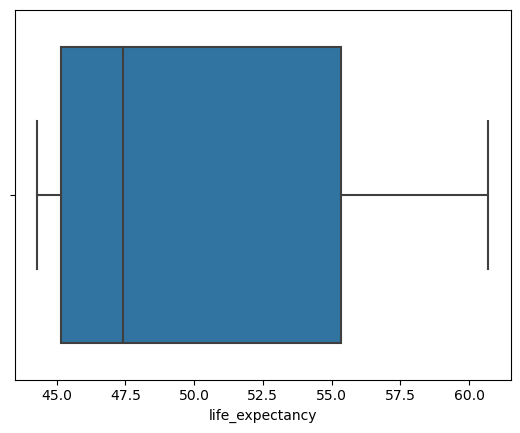

gdp
n: 16
Mean: 9.062579595062498
Median: 6.733671149999999


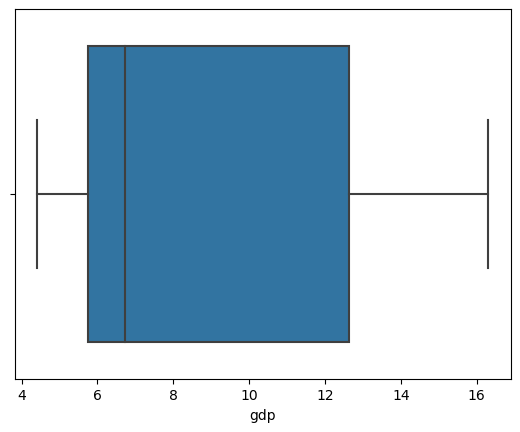

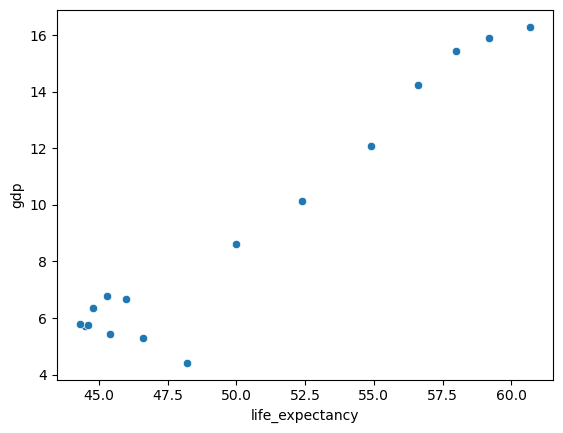

Pearson's correlation coefficient: 0.97
P value: <0.001


<Figure size 640x480 with 0 Axes>

In [160]:
def explore(dataframe, column_name):
    column_data = dataframe[column_name]
    mean = np.mean(column_data)
    median = np.median(column_data)
    data_count = len(column_data)
    print(column_name)
    print('n: ' + str(data_count))
    print('Mean: ' + str(mean))
    print('Median: ' + str(median))
    sns.boxplot(x=column_data, data=dataframe)
    plt.show()
    plt.clf()
    
    
def relationship(dataframe, x_column, y_column):
    explore(dataframe, x_column)
    explore(dataframe, y_column)
    sns.scatterplot(x=x_column, y=y_column, data=dataframe)
    plt.show()
    plt.clf()
    
    x_data = dataframe[x_column]
    y_data = dataframe[y_column]
    corr_coef, p_val = pearsonr(x_data, y_data)
    corr_coef = round(corr_coef, 2)
    p_val = round(p_val, 3)
    if p_val < 0.001:
        p_val = '<0.001'

    print("Pearson's correlation coefficient: " + str(corr_coef))
    print("P value: " + str(p_val))

#relationship(df_chile, 'life_expectancy', 'gdp')
relationship(df_zimbabwe, 'life_expectancy', 'gdp')

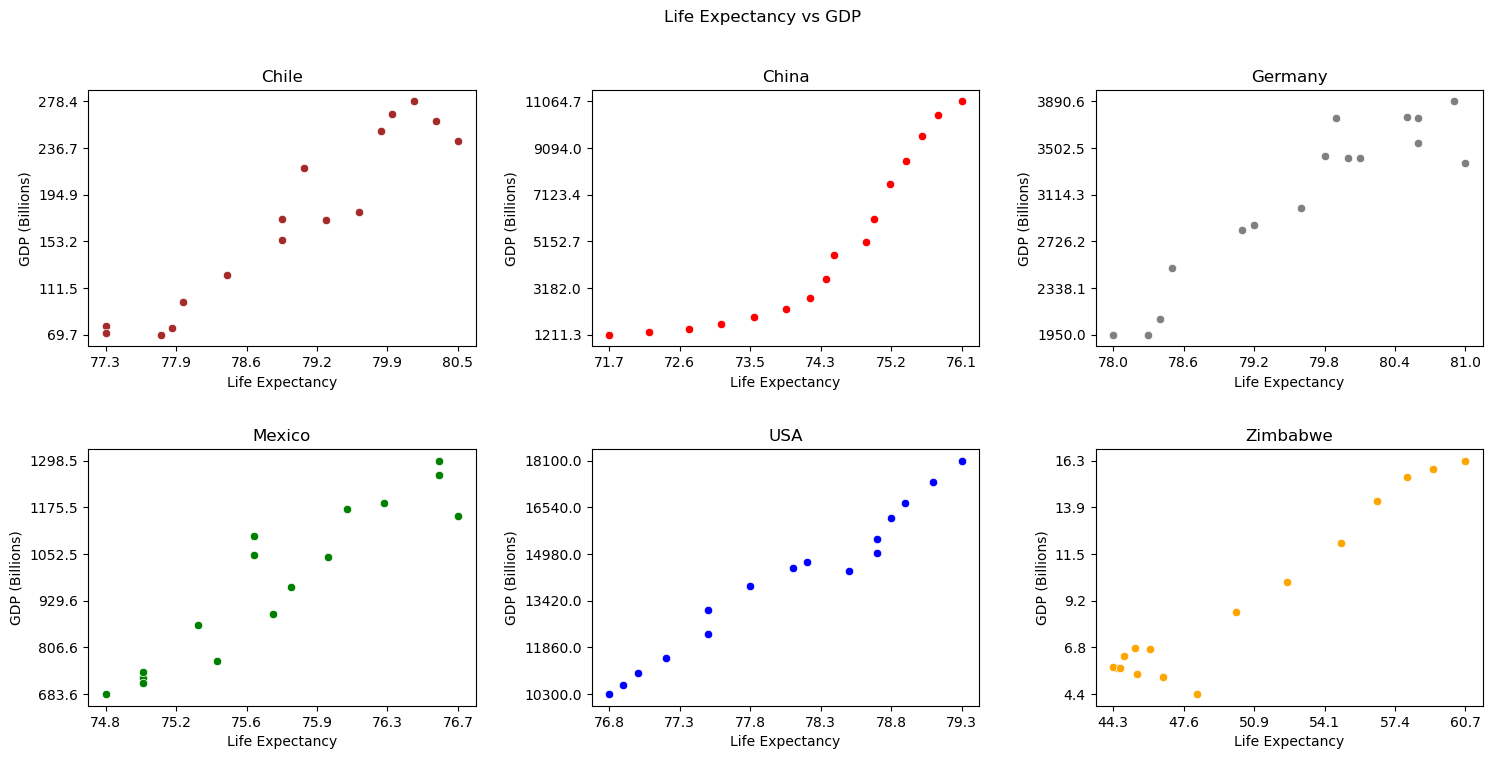

In [158]:
def draw_scatterplot(dataframe, x_values, y_values, title, colour):
    
    ax = sns.scatterplot(x=x_values,y=y_values, data=dataframe, color=colour)
    
    num_xticks = 6
    x_min, x_max = dataframe[x_values].min(), dataframe[x_values].max() 
    xtick_locs = np.linspace(x_min, x_max, num_xticks)  
    xtick_labels = [f'{tick:.1f}' for tick in xtick_locs]
    ax.set_xticks(xtick_locs)
    ax.set_xticklabels(xtick_labels)
    
    num_yticks = 6
    y_min, y_max = dataframe[y_values].min(), dataframe[y_values].max() 
    ytick_locs = np.linspace(y_min, y_max, num_yticks)  
    ytick_labels = [f'{tick:.1f}' for tick in ytick_locs]
    ax.set_yticks(ytick_locs)
    ax.set_yticklabels(ytick_labels)
    
    plt.title(title)
    plt.xlabel('Life Expectancy')
    plt.ylabel('GDP (Billions)')
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    
fig, axs = plt.subplots(2, 3, figsize=[18,8])

plt.subplot(2,3,1)
draw_scatterplot(df_chile, 'life_expectancy', 'gdp', 'Chile', 'brown')

plt.subplot(2,3,2)
draw_scatterplot(df_china, 'life_expectancy', 'gdp', 'China', 'red')

plt.subplot(2,3,3)
draw_scatterplot(df_germany, 'life_expectancy', 'gdp', 'Germany', 'grey')

plt.subplot(2,3,4)
draw_scatterplot(df_mexico, 'life_expectancy', 'gdp', 'Mexico', 'green')

plt.subplot(2,3,5)
draw_scatterplot(df_usa, 'life_expectancy', 'gdp', 'USA', 'blue')

plt.subplot(2,3,6)
draw_scatterplot(df_zimbabwe, 'life_expectancy', 'gdp', 'Zimbabwe', 'orange')


fig.suptitle('Life Expectancy vs GDP')
plt.show()